<a href="https://colab.research.google.com/github/nuriacasana/introgeodf/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/intro_geodataframe/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

The most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. In GitHub (cloud), create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to **Paidea** and download three compressed files from the folder **WorldMaps**.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [ ]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [ ]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# dimensions
countries.shape

(252, 2)

In [ ]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [ ]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [ ]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, those pandas commands are working fine, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

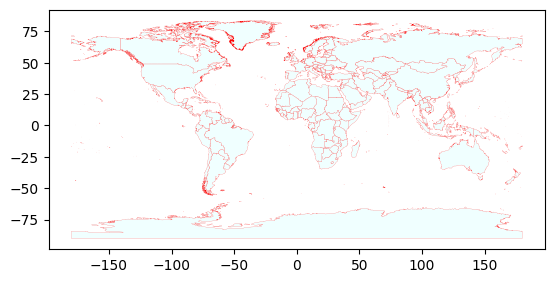

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [ ]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [ ]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

This is the rivers map:

<Axes: >

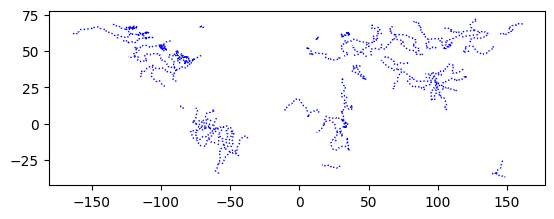

In [ ]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

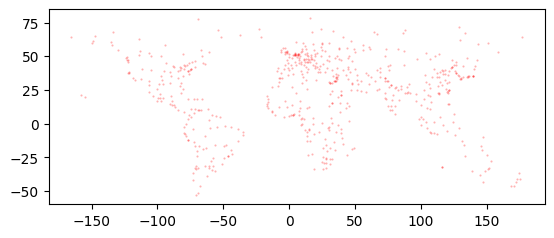

In [ ]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can start by creating the layer on the back (the base), and add layers on top:

<Axes: >

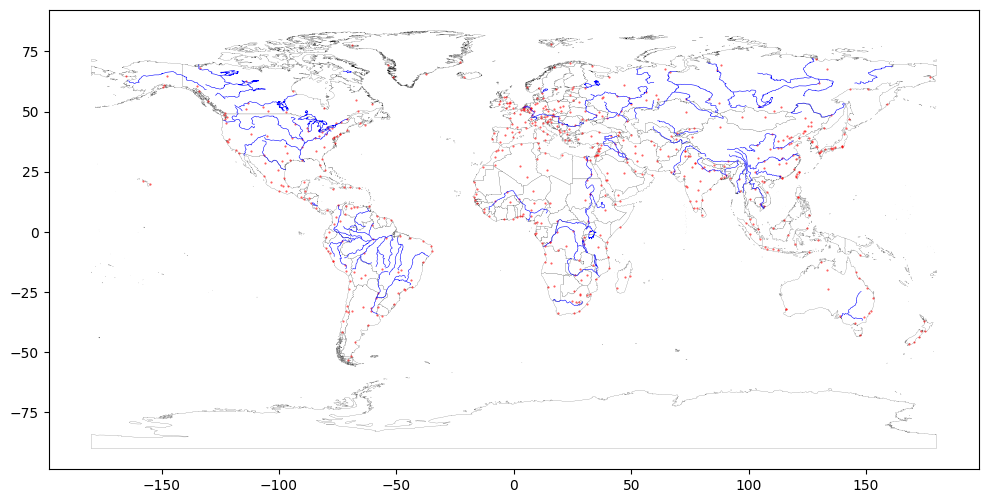

In [ ]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


Saving into a different format (not shapefile):

In [ ]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")


# Map Projection

The CRS is a very important property of the maps. They affect three some aspects:

* shape
* area
* scale
* direction

Most maps come with a default CRS: 4326. Pay attention:

In [ ]:
Germany=countries[countries.COUNTRY=='Germany']

In [ ]:
Germany.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# check units of measurement
Germany.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
# is this CRS projected?
Germany.crs.is_projected

False

Polygons have a centroid. When we try getting a centroid from an **unprojected** polygon, you get:

In [ ]:
# centroid
Germany.centroid

<ipython-input-24-2f788ec693f9>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Germany.centroid


,0
87,POINT (10.39365 51.10656)


## Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [ ]:
# recommended for Germany (meters)
Germany.to_crs(5243).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
# now this works with no warning
Germany.to_crs(5243).centroid

,0
87,POINT (-8846.157 5657.148)


<Axes: >

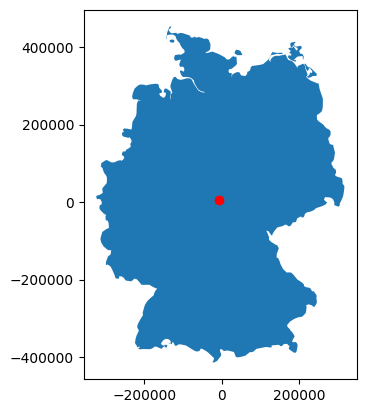

In [ ]:
# replotting:

base5243=Germany.to_crs(5243).plot()
Germany.to_crs(5243).centroid.plot(color='red',ax=base5243)

Let's keep the projected version for all our maps:

In [36]:
cities_Germany_5243=cities[cities.COUNTRY=='Germany'].to_crs(5243)

In [37]:
riversGermany_clipped=gpd.clip(rivers,Germany)

In [38]:
Germany_5243=Germany.to_crs(5243)

rivers_Germany_5243=riversGermany_clipped.to_crs(Germany_5243.crs)

In [39]:
## saving


import os

Germany_5243.to_file(os.path.join("maps","GermanyMaps_5243.gpkg"), layer='country', driver="GPKG")
cities_Germany_5243.to_file(os.path.join("maps","GermanyMaps_5243.gpkg"), layer='cities', driver="GPKG")
rivers_Germany_5243.to_file(os.path.join("maps","GermanyMaps_5243.gpkg"), layer='rivers', driver="GPKG")
#Germany_5243.centroid.to_file(os.path.join("maps","GermanyMaps_5243.gpkg"), layer='centroid', driver="GPKG")

### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

## Creating Spatial data

You have a "data"folder in **Paideia** with a CSV file with information on the airports in Brazil. Create a similar 'data' folder in your local computer, inside the current _repo_.

Let's open the **CSV**:

In [96]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
83094,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
83095,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83096,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,NaN,NaN,87TX,87TX,NaN,NaN,NaN
83097,313629,ZZZZ,small_airport,Satsuma Iōjima Airport,30.784722,130.270556,338.0,AS,JP,JP-46,Mishima,no,NaN,NaN,RJX7,RJX7,NaN,http://wikimapia.org/6705190/Satsuma-Iwo-jima-...,"SATSUMA,IWOJIMA,RJX7"


In [92]:
infoairports['iso_country']

,iso_country
0,US
1,US
2,US
3,US
4,US
...,...
83093,CN
83094,GB
83095,TF
83096,US


In [97]:
infoairports = infoairports[infoairports['iso_country'] == 'DE']

This needs some cleaning:

In [99]:
# bye first row
infoairports.reset_index(drop=True, inplace=True)
infoairports.drop(index=0,inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
1,332693,DE-0002,closed,Ahlhorn Highway Strip,52.929984,8.173538,NaN,EU,DE,DE-NI,Großenkneten,no,NaN,NaN,NaN,NaN,NaN,NaN,Ahlhorn Autobahn-Notlandeplatz NLP
2,299694,DE-0003,small_airport,August Euler Airfield,49.853757,8.586243,358.0,EU,DE,DE-HE,Griesheim,no,NaN,NaN,EDES,NaN,https://web.archive.org/web/20201019233127/htt...,https://en.wikipedia.org/wiki/Griesheim_Airport,"ZCS, August-Euler Flugplatz, Griesheim Airport"
3,28576,DE-0004,small_airport,Gransee Airfield,53.006280,13.202177,164.0,EU,DE,DE-BR,Gransee,no,EDUG,NaN,NaN,NaN,http://www.gojump.de/,https://de.wikipedia.org/wiki/Flugplatz_Gransee,NaN
4,322973,DE-0005,small_airport,Warngau Airfield,47.823990,11.703980,2380.0,EU,DE,DE-BY,Warngau,no,NaN,NaN,NaN,NaN,http://www.fliegerclub-warngau.de,NaN,"münchen, munich, wargau"
5,43128,DE-0006,small_airport,Locktow Airfield,52.116500,12.709562,213.0,EU,DE,DE-BR,Planetal,no,NaN,NaN,NaN,NaN,NaN,NaN,Sonderlandeplatz Locktow


In [100]:
# keep the  columns needed

infoairports.columns


Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [101]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','iso_region','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 1 to 1398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1398 non-null   object 
 1   type           1398 non-null   object 
 2   latitude_deg   1398 non-null   float64
 3   longitude_deg  1398 non-null   float64
 4   elevation_ft   1214 non-null   float64
 5   iso_region     1398 non-null   object 
 6   municipality   1365 non-null   object 
dtypes: float64(3), object(4)
memory usage: 76.6+ KB


Some formatting:

In [102]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [103]:
# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 1 to 1398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1398 non-null   object 
 1   type           1398 non-null   object 
 2   latitude_deg   1398 non-null   float64
 3   longitude_deg  1398 non-null   float64
 4   elevation_ft   1214 non-null   float64
 5   iso_region     1398 non-null   object 
 6   municipality   1365 non-null   object 
dtypes: float64(3), object(4)
memory usage: 76.6+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

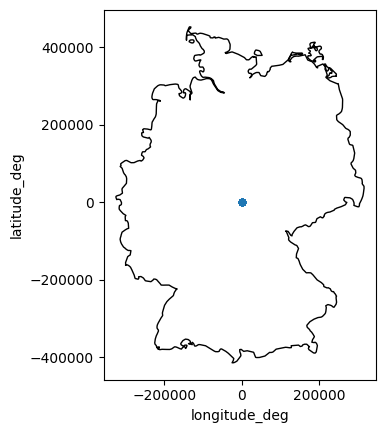

In [104]:
# let's plot

base = Germany_5243.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Why is it wrong?

<Axes: >

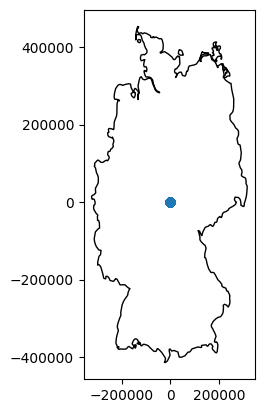

In [105]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=Germany.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = Germany_5243.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [106]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Let's re project!

<Axes: >

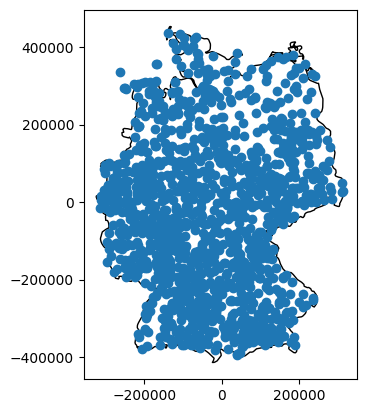

In [107]:
airports_5243=airports.to_crs(5243)

## then

base = Germany_5243.plot(color='white', edgecolor='black')
airports_5243.plot(ax=base)

Remember you have type of airports:

In [108]:
airports_5243['type'].value_counts() # this will not work: airports.type.value_counts()

,count
type,
small_airport,768
heliport,450
closed,105
medium_airport,62
large_airport,10
balloonport,2
seaplane_base,1


We may use that in the future. For now, just rename the **type** column to a different one.

In [109]:
airports_5243.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_5243.to_file(os.path.join("maps","GermanylMaps_5243.gpkg"), layer='airports', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

<a class="anchor" id="11"></a>

## Formating Geoseries projections



You know **brazil_5641** is a multipolygon:

In [110]:
Germany_5243

,COUNTRY,geometry
87,Germany,"MULTIPOLYGON (((-228178.47 -198681.783, -22862..."


Sometime, you just need the border (lines):

In [111]:
Germany_5243.boundary

,0
87,"MULTILINESTRING ((-228178.47 -198681.783, -228..."


<Axes: >

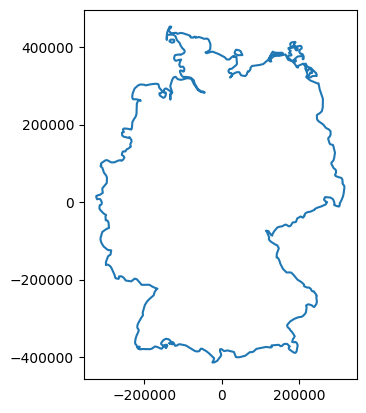

In [112]:
# This is just the borderline
Germany_5243.boundary.plot()

Always check the data type:

In [113]:
# does 'boundary' return a GDF?
type(Germany_5243.boundary)

geopandas.geoseries.GeoSeries

Some operations in geopandas require GDF or GS. If you need a GDF instead of a GS:

In [114]:
# converting into GDF
Germany_5243.boundary.to_frame()

,0
87,"MULTILINESTRING ((-228178.47 -198681.783, -228..."


In [115]:
Germany_5243.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 87 to 87
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


Notice you get a very simple GDF, and you may want to add some information:

In [119]:
# conversion
Germany_border=Germany_5243.boundary.to_frame()

# new column (optional)
Germany_border['name']='Germany'

# renaming the geometry column
Germany_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
Germany_border = Germany_border.set_geometry("geometry")

# verifying:
Germany_border.crs

<Projected CRS: EPSG:5243>
Name: ETRS89 / LCC Germany (E-N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Germany - onshore - states of Baden-Wurtemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thuringen.
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [120]:
Germany_border

,geometry,name
87,"MULTILINESTRING ((-228178.47 -198681.783, -228...",Germany


You can add this GDF as a layer.

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

<a class="anchor" id="12"></a>

## Maps Lacking CRS information

Reprojecting seems a simple process, but you might find some interesting cases.

Download the compressed file "Brazil_subnational". Unzip or decompress that files. Move the decompressed folder into your current _maps_ folder.

Let's read the maps on _states_(adm1) and _municipalities_ (adm2):

In [ ]:
Germany_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
Germany_municipalities=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

They are maps, for sure:

In [ ]:
type(Germany_states), type(Germany_municipalities)

In [ ]:
Germany_states.geometry.head()

In [ ]:
Germany_municipalities.geometry.head()

But, notice this:

In [ ]:
Germany_states.crs, Germany_municipalities.crs

They do not have crs information, however they can be plotted:

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


Since we are using the crs 5641 for Brazil, the initial strategy could be to set the CRS with the right projection :

In [ ]:
## uncomment this to see the error message
# brazil_states.to_crs(5641)

Python says _"Please set a crs on the object first"_. This would mean to know the actual projection, of the geometry:

From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [ ]:
# set as unprojected
brazil_states.crs = "EPSG:4326"
brazil_municipalities.crs = "EPSG:4326"

Now, we can reproject:

In [ ]:
brazil_states=brazil_states.to_crs(5641)
brazil_municipalities=brazil_municipalities.to_crs(5641)

In [ ]:
brazil_states.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='states', driver="GPKG")
brazil_municipalities.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='municipalities', driver="GPKG")

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

## Geo Merging

The countries map has no interesting information beyond the geometry.

In [ ]:
countries.head()

Let add some information to each country:

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

We want to add the _fragilityCia_ data into the map. That is the merging process.
For that, we need a common column. The _Country_ column is the option.

In [ ]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [ ]:
onlyFragilCia

In [ ]:
# and here
onlyMap

## Fuzzy merging

Let's find similar names:

In [ ]:
# !pip install thefuzz

In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

Preparing a _dict_ of changes:

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

Making changes and updating:

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

In [ ]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:

pd.melt(theMapAndData[DataNames])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
# !pip install -U scikit-learn

* **StandardScaler**:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

In [ ]:
# !pip install mapclassify

Let me discretize **fragility_Qt**:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

We are ready for a choropleth:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>